# Часть 1 - Обработка данных опросника WVS

In [2]:
import pandas as pd

In [51]:
data = pd.DataFrame(pd.read_excel('wvs.xlsx'))
data.head()

,V1,V2,V2A,COW,C_COW_ALPHA,B_COUNTRY_ALPHA,V3,V4,V5,V6,...,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B
0,6,12,12,615,ALG,DZA,1,1,1,1,...,0,0,0.222222,0.074074,1.0,0,0.5,0.25,0.25,1.0
1,6,12,12,615,ALG,DZA,2,1,2,3,...,0,0,0,0,1.0,0.66,0,0.33,0.33,1.0
2,6,12,12,615,ALG,DZA,3,1,3,2,...,0,0,0.333333,0.111111,1.0,0.33,0,0.165,0.165,1.0
3,6,12,12,615,ALG,DZA,4,1,1,3,...,0,0,0,0,1.0,0,0,0,0,1.0
4,6,12,12,615,ALG,DZA,5,1,1,1,...,0,0,0.222222,0.074074,1.0,0.66,0,0.33,0.33,1.0


In [52]:
data1 = data[['C_COW_ALPHA', 'V39']]
data1.head()

,C_COW_ALPHA,V39
0,ALG,2
1,ALG,2
2,ALG,2
3,ALG,2
4,ALG,1


In [78]:
data2 = data1.groupby(by = ['C_COW_ALPHA','V39']).agg({'V39':'count'}).rename(columns = {'V39':'otvet'})

In [79]:
data2 = data2.reset_index()
data2 = data2[(data2['V39'] == 1) | (data2['V39'] == 2)]
data2 = data2.reset_index(drop = True)

In [80]:
data2

,C_COW_ALPHA,V39,otvet
0,ALG,1,336
1,ALG,2,864
2,ARG,1,32
3,ARG,2,998
4,ARM,1,205
...,...,...,...
113,UZB,2,1316
114,YEM,1,242
115,YEM,2,758
116,ZIM,1,184


In [81]:
a = []
for i in range (0, len(data2), 2):
    x = data2.iloc[i]['otvet'] + data2.iloc[i+1]['otvet']
    a.append(data2.iloc[i]['otvet']/x)
    a.append(data2.iloc[i+1]['otvet']/x)
data2['%']=a

In [82]:
data2

,C_COW_ALPHA,V39,otvet,%
0,ALG,1,336,0.280000
1,ALG,2,864,0.720000
2,ARG,1,32,0.031068
3,ARG,2,998,0.968932
4,ARM,1,205,0.186364
...,...,...,...,...
113,UZB,2,1316,0.877333
114,YEM,1,242,0.242000
115,YEM,2,758,0.758000
116,ZIM,1,184,0.122667


In [86]:
data2.to_excel('data2.xlsx')

# Часть 2 - обработка данных об индексе эффективности образования

In [3]:
edu = pd.read_excel('edu.xlsx') # датафрейм с индексом образования
edu.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,...,0.372,0.374,0.390,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,Albania,0.583,0.588,0.557,0.542,0.528,0.550,0.557,0.569,0.579,...,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,...,0.626,0.644,0.639,0.639,0.652,0.659,0.660,0.665,0.668,0.672
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.670,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,0.500,0.500


In [4]:
edu['avg_edu'] = 0.25 * (edu[2011] + edu[2012] + edu[2013] + edu[2014])
edu_11_14 = edu[['Country', 'avg_edu']]

edu_11_14.head() # создаём таблицу с усреднённым индексом образования за 11 - 14 гг

,Country,avg_edu
0,Afghanistan,0.39125
1,Albania,0.74000
2,Algeria,0.64350
3,Andorra,0.70850
4,Angola,0.44125


In [5]:
edu_11_14.iloc[0,0]  # в данных битые названия стран

'\xa0Afghanistan'

In [6]:
import re

pattern = '[a-zA-Z]{4,}'

for i in range(len(edu_11_14)):
    text = edu_11_14.iloc[i,0]
    edu_11_14.iloc[i,0] = re.findall(pattern,text)[0]

print(edu_11_14.iloc[0,0])

Afghanistan


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# Часть 3 - Подготовка данных об отношении к мигрантам

При предобработке таблицы с данными опроса по мигрантам мы случайно удалили столбец со страной, оставив только код страны, поэтому впоследствии пришлось восстанавливать данные о стране.

In [7]:
migrants = pd.read_excel('data2.xlsx')
del migrants['Unnamed: 0']
migrants = migrants[(migrants['V39'] == 1)]
migrants.head()

,C_COW_ALPHA,V39,otvet,%
0,ALG,1,336,0.280000
2,ARG,1,32,0.031068
4,ARM,1,205,0.186364
6,AUL,1,137,0.092756
8,AZE,1,394,0.393214


In [8]:
countries = pd.read_excel('code_poll.xlsx')  # список стран с кодировкой из таблицы с опросом
del countries['Unnamed: 0']
countries.head()

,code,country
0,USA,United States of America
1,HAI,Haiti
2,TRI,Trinidad and Tobago
3,MEX,Mexico
4,COL,Colombia


In [9]:
migrants = pd.merge(migrants,countries,left_on = 'C_COW_ALPHA', right_on = 'code')
migrants.head()

,C_COW_ALPHA,V39,otvet,%,code,country
0,ALG,1,336,0.280000,ALG,Algeria
1,ARG,1,32,0.031068,ARG,Argentina
2,ARM,1,205,0.186364,ARM,Armenia
3,AUL,1,137,0.092756,AUL,Australia
4,AZE,1,394,0.393214,AZE,Azerbaijan


In [10]:
# финальный датафрейм
df = pd.merge(migrants, edu_11_14, left_on = 'country', right_on = 'Country')
df = df.rename(columns = {'avg_edu': 'Индекс эффективности образования',
                           '%': 'Доля граждан, указавших мигрантов в качестве нежелательной группы'})
del df['country']
del df['C_COW_ALPHA']
del df['V39']
del df['otvet']
del df['code']


df.head()

,"Доля граждан, указавших мигрантов в качестве нежелательной группы",Country,Индекс эффективности образования
0,0.280000,Algeria,0.64350
1,0.031068,Argentina,0.82350
2,0.186364,Armenia,0.74050
3,0.092756,Australia,0.91600
4,0.393214,Azerbaijan,0.66775


In [11]:
print ('Количество наблюдений в исходной выборке составило',len(df))

Количество наблюдений в исходной выборке составило 50


# Часть 4 - описательная статистика

In [23]:
df.describe()

,"Доля граждан, указавших мигрантов в качестве нежелательной группы",Индекс эффективности образования
count,50.000000,50.000000
mean,0.232939,0.683855
std,0.151224,0.145442
min,0.015091,0.341500
25%,0.109500,0.619125
50%,0.203870,0.672125
75%,0.361342,0.799313
max,0.584702,0.931750


(0.0, 1.0)

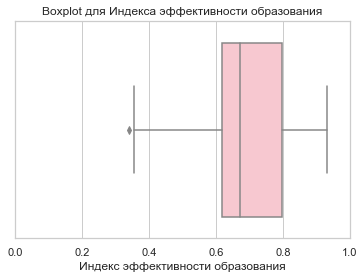

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df["Индекс эффективности образования"],
                 color = 'pink').set_title('Boxplot для Индекса эффективности образования')
sns.set(rc={'figure.figsize':(8,6)})
plt.xlim(0, 1)

(0.0, 1.0)

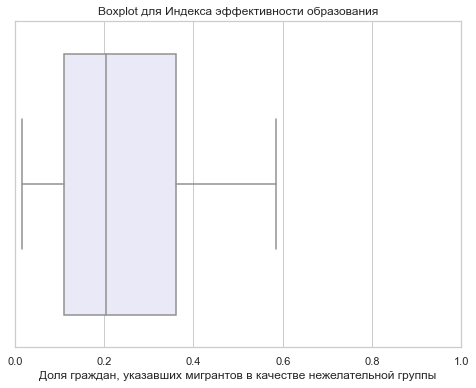

In [26]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df["Доля граждан, указавших мигрантов в качестве нежелательной группы"],
                 color = 'lavender').set_title('Boxplot для Индекса эффективности образования')
sns.set(rc={'figure.figsize':(8,6)})
plt.xlim(0, 1)

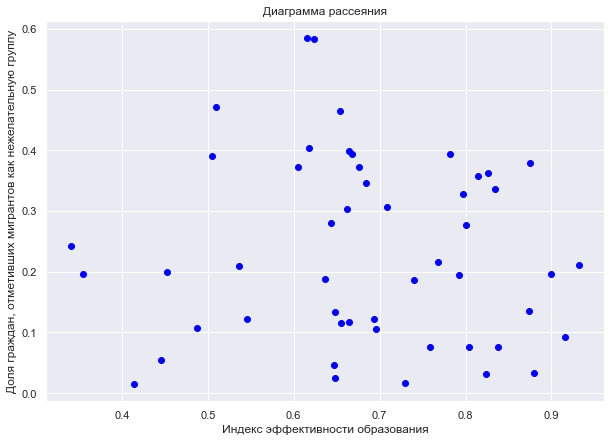

In [30]:
fig, ax = plt.subplots()

plt.scatter(df['Индекс эффективности образования'], df['Доля граждан, указавших мигрантов в качестве нежелательной группы'], c = 'blue')
plt.xlabel('Индекс эффективности образования')
plt.ylabel('Доля граждан, отметивших мигрантов как нежелательную группу')
plt.title('Диаграмма рассеяния')

fig.set_figwidth(10)    
fig.set_figheight(7)

In [13]:
df = df.rename(columns = {'Индекс эффективности образования': 'EI',
                           'Доля граждан, указавших мигрантов в качестве нежелательной группы':'MIGR'})

In [14]:
outliers = df[(df['EI'] < 0.6)&(df['MIGR']<0.15)]
outliers

,MIGR,Country,EI
16,0.015091,Haiti,0.41475
27,0.107500,Morocco,0.48725
37,0.054355,Rwanda,0.44575
49,0.122667,Zimbabwe,0.54550


In [15]:
not_outliers = df[(df['EI'] >= 0.6)|(df['MIGR']>=0.15)]

In [16]:
list_of_outliers = outliers['Country'].tolist()
indexes_of_outliers = outliers.index.tolist()
indexes_of_outliers

[16, 27, 37, 49]

In [17]:
df['is_outlier'] = 0

for id in indexes_of_outliers:
    df.loc[id, 'is_outlier'] = 1

In [18]:
df = df.rename(columns = {'EI':'Индекс эффективности образования',
                           'MIGR':'Доля граждан, указавших мигрантов в качестве нежелательной группы'})

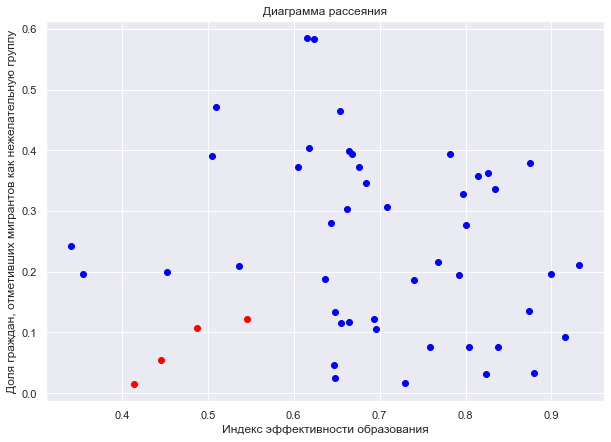

In [38]:
fig, ax = plt.subplots()

plt.scatter(not_outliers['EI'], not_outliers['MIGR'], c = 'blue')
plt.scatter(outliers['EI'], outliers['MIGR'], c = 'red')
plt.xlabel('Индекс эффективности образования')
plt.ylabel('Доля граждан, отметивших мигрантов как нежелательную группу')
plt.title('Диаграмма рассеяния')

fig.set_figwidth(10)    
fig.set_figheight(7)

# Часть 5 - регрессионная модель

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
reg = LinearRegression().fit(not_outliers['EI'].values.reshape(-1, 1), not_outliers['MIGR'].values)

In [21]:
reg.coef_

array([-0.25776162])

In [22]:
reg.intercept_

0.42767158285629914

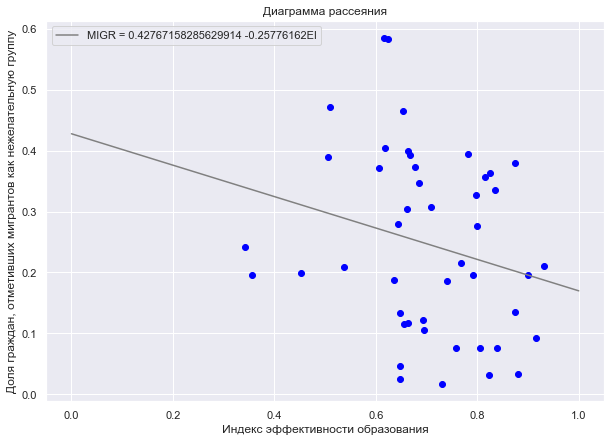

In [44]:
fig, ax = plt.subplots()

x = np.linspace(0, 1, 100)
h = 0.42767158285629914-0.25776162 * x # МНК - оценка

plt.scatter(not_outliers['EI'], not_outliers['MIGR'], c = 'blue')
plt.plot(x,h,
        color = 'grey')
plt.xlabel('Индекс эффективности образования')
plt.ylabel('Доля граждан, отметивших мигрантов как нежелательную группу')
plt.title('Диаграмма рассеяния')
plt.legend(['MIGR = 0.42767158285629914 -0.25776162EI'])
#plt.style.use('white')

fig.set_figwidth(10)    
fig.set_figheight(7)

In [45]:
len(not_outliers)

46

In [46]:
from sklearn import metrics
from scipy import stats

def regression_coef(model, X, y, N):
    # создаём датафрейм, в котором одна колонка - название коэффициентов, другая - их величина
    coef = pd.DataFrame({'predictor':['intercept', 'X'], 'coef':[model.intercept_, model.coef_[0]]})
    
    X1 = np.append(X.reshape(-1, 1), np.ones((len(X),1)), axis=1)

    RSS = metrics.mean_squared_error(y, model.predict(X.reshape(-1, 1))) * N / (N-1)
    var_b = RSS * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    
    t = np.array([model.intercept_, model.coef_[0]])/ sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (N - 2))) for i in t]
    coef['is_significant'] = coef['pvalue'] < 0.05
    coef['t'] =t
    return coef

In [49]:
regression_coef(reg, not_outliers['EI'].values.reshape(-1, 1), not_outliers['MIGR'].values, len(not_outliers))

,predictor,coef,pvalue,is_significant,t
0,intercept,0.427672,0.010072,True,2.689479
1,X,-0.257762,0.028342,True,-2.267223


In [78]:
not_outliers.reset_index(drop = True).to_excel('not_outliers.xls')

In [79]:
outliers.reset_index(drop = True).to_excel('outliers.xls')

In [32]:
print('R^2 равен', reg.score(not_outliers['EI'].values.reshape(-1, 1), not_outliers['MIGR'].values))
print('MSE равна', metrics.mean_squared_error(reg.predict(not_outliers['EI'].values.reshape(-1, 1)),not_outliers['MIGR'].values))

R^2 равен 0.05516881059186751
MSE равна 0.020635002714684287
